# Hoja de Trabajo \# 2-1 


---


por Josué Obregón <br>
DS6011 - Feature Engineering <br>
UVG Masters - Escuela de Negocios<br>


## Objetivos

El objetivo de esta hoja de trabajo  es presentar al estudiante diferentes técnicas de visualización de datos para ayudar a entender las características y el comportamiento de la variable objetivo en los modelos predictivos.

Así mismo, las técnicas también son útiles para entender la relación de las distintas variables predictoras, entre ellas mismas y con la variable objetivo.

Como objetivo adicional, también se busca que el estudiante conozca el funcionamiento de dos librerías de visualización de datos del lenguaje python: [Seaborn](https://seaborn.pydata.org/) y [Plotly express](https://plotly.com/python/plotly-express/).

El análisis presentado en esta hoja de trabajo está basado en la [sección 4.2](http://www.feat.engineering/visualizations-for-numeric-data-exploring-train-ridership-data.html) del libro **Feature engineering and selection: A practical approach for predictive models**. Intentaremos generar las visualizaciones lo más fielmente posible a las presentadas en el libro.


## Importación de librerías y carga de los datos a varios pandas [DataFrames](https://pandas.pydata.org/pandas-docs/version/1.1.5/reference/frame.html)


Las librerías que importaremos para empezar son pandas y numpy para el manejo de los datos, y matplotlib, seaborn y plotly para la generación de visualizaciones. 

Los datos fueron obtenidos del [portal de datos de Chicago](https://data.cityofchicago.org/Transportation/CTA-Ridership-L-Station-Entries-Daily-Totals/5neh-572f).

Los datos necesitan cierto preprocesamiento, pero el objetivo de esta hoja de trabajo no es ese, así que incluyo dos archivos extra. El primero es donde están registrados los días usados para el análisis, y el segundo son atributos creados por el autor del libro. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
!mkdir data

In [3]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG', # chicago_train_data  https://drive.google.com/file/d/1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-', # train_days   https://drive.google.com/file/d/1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-/view?usp=sharing 
        'https://drive.google.com/uc?export=download&id=18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN', # extra data chicago https://drive.google.com/file/d/18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN/view?usp=sharing
        'https://drive.google.com/uc?export=download&id=13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o', # chichago_gas_prices https://drive.google.com/file/d/13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o/view?usp=sharing 
        'https://drive.google.com/uc?export=download&id=1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX' # https://drive.google.com/file/d/1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX/view?usp=sharing
        ]
outputs = ['chicago_train_data.csv','train_days.csv' ,
           'extra_data_chicago.csv','chicago_gas_prices.csv',
           'lag_14_data.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1GiEi6LVHBAAX4IWVA2gRH1gJZ1vLYghG
To: /content/data/chicago_train_data.csv
100%|██████████| 38.2M/38.2M [00:01<00:00, 31.0MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1LIK0YFER5ve9Wn7Uap4Zb6f5pXcAExZ-
To: /content/data/train_days.csv
100%|██████████| 107k/107k [00:00<00:00, 87.8MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=18pIOZQXBOSwT-t69icoGZgZh-kUUFMrN
To: /content/data/extra_data_chicago.csv
100%|██████████| 1.32M/1.32M [00:00<00:00, 89.2MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=13ofbMM3hiY44MlHmWWQw9_6WGGoV4J4o
To: /content/data/chicago_gas_prices.csv
100%|██████████| 14.2k/14.2k [00:00<00:00, 32.3MB/s]
Downloading...
From: https://drive.google.com/uc?export=download&id=1Zd_v6ufxJ8FEHSVgq9jKQbpPu5dW1rFX
To: /content/data/lag_14_data.csv
100%|██████████| 4.25M/4.25M [00:00<00:00, 16.5MB/s]


In [4]:
df = pd.read_csv('data/chicago_train_data.csv', parse_dates=True, index_col=2)
train_days = pd.read_csv('data/train_days.csv',index_col=1, parse_dates=True)
extra_data = pd.read_csv('data/extra_data_chicago.csv',index_col=0, parse_dates=True)

In [5]:
df.head(5)

,station_id,stationname,daytype,rides
date,,,,
2017-12-22,41280,Jefferson Park,W,6104
2017-12-18,41000,Cermak-Chinatown,W,3636
2017-12-02,40280,Central-Lake,A,1270
2017-12-19,40140,Dempster-Skokie,W,1759
2017-12-03,40690,Dempster,U,499


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036763 entries, 2017-12-22 to 2020-11-30
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   station_id   1036763 non-null  int64 
 1   stationname  1036763 non-null  object
 2   daytype      1036763 non-null  object
 3   rides        1036763 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 39.5+ MB


In [7]:
df = df.sort_index()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036763 entries, 2001-01-01 to 2020-11-30
Data columns (total 4 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   station_id   1036763 non-null  int64 
 1   stationname  1036763 non-null  object
 2   daytype      1036763 non-null  object
 3   rides        1036763 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 39.5+ MB


In [8]:
df.loc[train_days.index]

,station_id,stationname,daytype,rides
date,,,,
2001-01-22,40240,79th,W,7697
2001-01-22,40090,Damen-Brown,W,2035
2001-01-22,40120,35th/Archer,W,2150
2001-01-22,41260,Austin-Lake,W,2053
2001-01-22,40750,Harlem-O'Hare,W,2665
...,...,...,...,...
2016-08-28,41090,Monroe/State,U,3192
2016-08-28,40040,Quincy/Wells,U,1302
2016-08-28,40830,18th,U,1022


In [9]:
df.index.year.unique()

Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
           dtype='int64', name='date')

In [10]:
df_cl = df[df.stationname=='Clark/Lake'][['daytype'	,'rides']] # let's focus on Clark/Lake station
df_cl ['rides_x1000']= df_cl.rides/1000 # transform 
df_cl['part_of_the_week']=df_cl.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')

In [11]:
df_cl.index.duplicated().sum()

1

In [12]:
df_cl = df_cl[~df_cl.index.duplicated(keep='first')] # there was one record duplicated index 3815 value '2011-07-03'
print(df_cl.index.duplicated().sum())
train_df_cl = df_cl.loc[train_days.index] # define our training data with train days

0


## Gráficos de cajas, Gráficos de violin, Histogramas y Gráficos de densidad



In [13]:
sns.set_style("darkgrid") # Others whitegrid, white, dark, ticks https://www.python-graph-gallery.com/104-seaborn-themes 

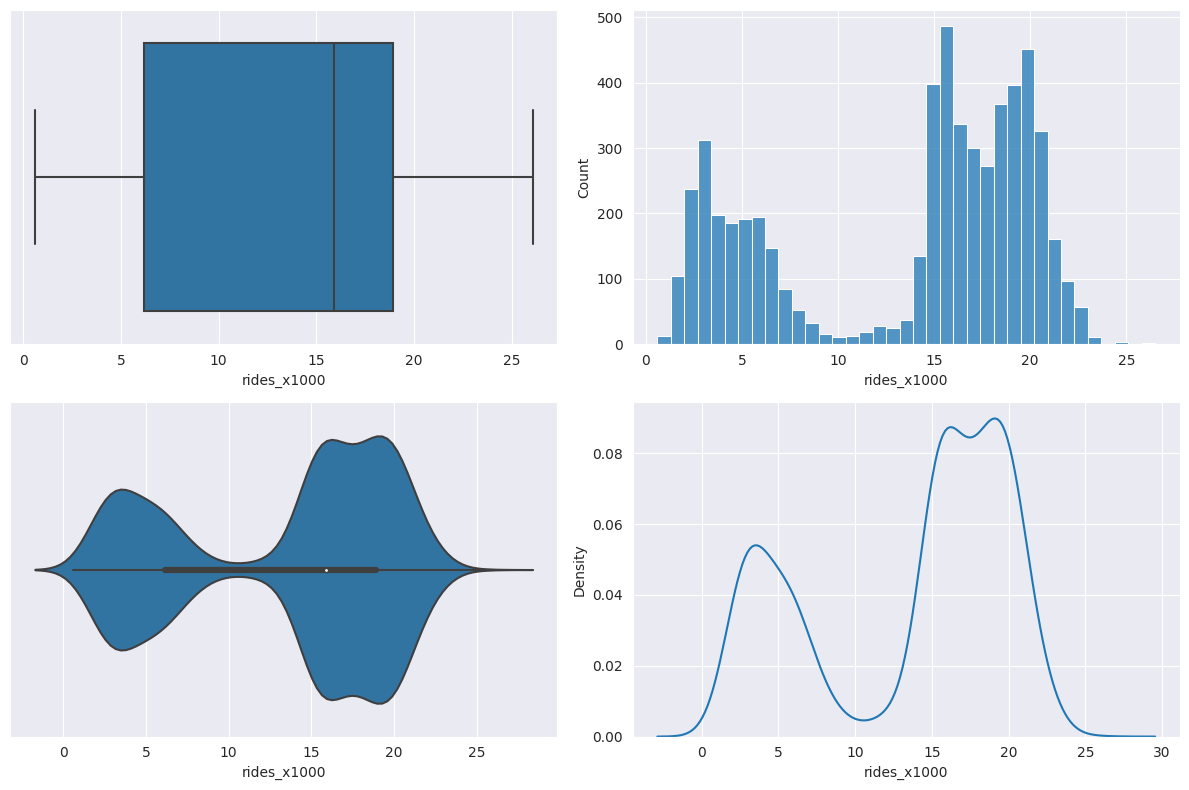

In [14]:
fig, axs = plt.subplots(2,2, figsize=(12,8)) #create grid
sns.boxplot(data=train_df_cl, x='rides_x1000', orient='h', ax=axs[0,0])
sns.histplot(data=train_df_cl,x='rides_x1000', binwidth=0.7, ax=axs[0,1])
sns.violinplot(data=train_df_cl,x='rides_x1000', ax=axs[1,0])
sns.kdeplot(data=train_df_cl, x='rides_x1000', ax=axs[1,1])
plt.tight_layout()

### Aumentando las visualizaciones con facetas, colores y formas

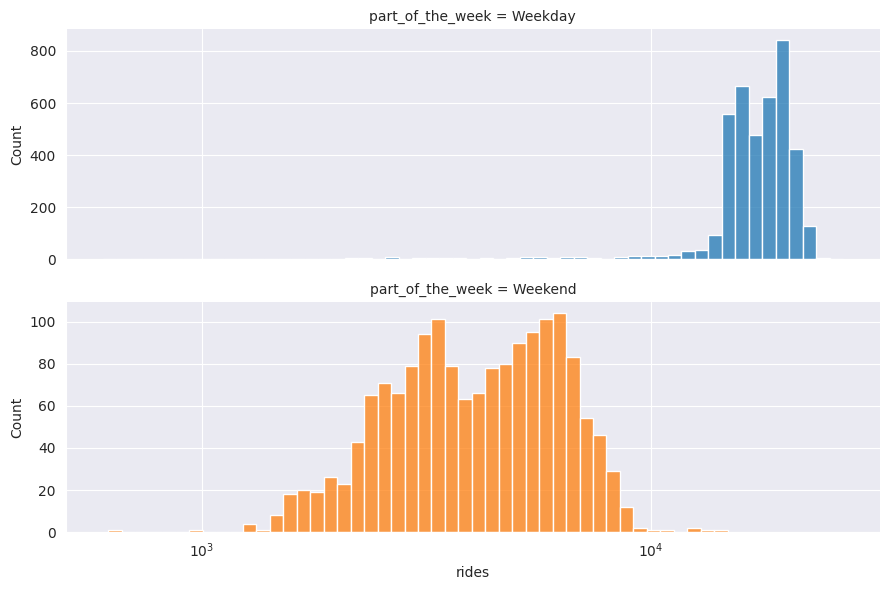

In [15]:
g = sns.FacetGrid(train_df_cl, sharey=False, row='part_of_the_week',  hue='part_of_the_week',height=3, aspect=3)
g.map_dataframe(sns.histplot, x='rides', log_scale=True, binwidth=0.03)

## Gráficos de dispersión



In [16]:
train_df_cl['two_week_lag_rides'] = train_df_cl['rides'].shift(periods=14, fill_value = 0) # We create a lagging variable of two weeks
train_df_cl ['two_week_lag_rides_x1000']= train_df_cl['two_week_lag_rides']/1000

In [17]:
train_df_cl.head(16)

,daytype,rides,rides_x1000,part_of_the_week,two_week_lag_rides,two_week_lag_rides_x1000
date,,,,,,
2001-01-22,W,15732,15.732,Weekday,0,0.000
2001-01-23,W,15762,15.762,Weekday,0,0.000
2001-01-24,W,15872,15.872,Weekday,0,0.000
2001-01-25,W,15874,15.874,Weekday,0,0.000
2001-01-26,W,15423,15.423,Weekday,0,0.000
2001-01-27,A,2425,2.425,Weekend,0,0.000
2001-01-28,U,1467,1.467,Weekend,0,0.000
2001-01-29,W,15511,15.511,Weekday,0,0.000
2001-01-30,W,15927,15.927,Weekday,0,0.000


<Axes: xlabel='two_week_lag_rides_x1000', ylabel='rides_x1000'>

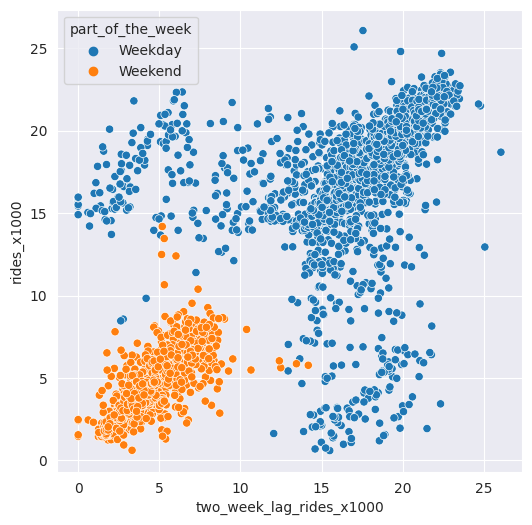

In [18]:
plt.figure(figsize=(6,6)) 
sns.scatterplot(data=train_df_cl, x='two_week_lag_rides_x1000', y='rides_x1000', hue='part_of_the_week')

## Mapas de calor

Creamos una variable indicador para valores entre semana que sean menores a 10,000 pasajeros

In [19]:
train_df_cl['less_than_10000']= train_df_cl.rides<=10000
train_df_cl['less_than_10000'] = train_df_cl['less_than_10000'].astype(int) # to transforme it to int, i.e. True=1 and False=0
train_df_cl['month_name'] = train_df_cl.index.month_name() 
train_df_cl['month'] = train_df_cl.index.month
train_df_cl['day'] = train_df_cl.index.day
train_df_cl['month_day']= train_df_cl['month'].apply('{:0>2d}'.format) +'-' + train_df_cl['day'].apply('{:0>2d}'.format) # To create a format mm-dd
train_df_cl['year'] = train_df_cl.index.year

In [20]:
train_df_cl['2001-02'].head()

<ipython-input-20-89df1face218>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  train_df_cl['2001-02'].head()


,daytype,rides,rides_x1000,part_of_the_week,two_week_lag_rides,two_week_lag_rides_x1000,less_than_10000,month_name,month,day,month_day,year
date,,,,,,,,,,,,
2001-02-01,W,15960,15.960,Weekday,0,0.000,0,February,2,1,02-01,2001
2001-02-02,W,14900,14.900,Weekday,0,0.000,0,February,2,2,02-02,2001
2001-02-03,A,2477,2.477,Weekend,0,0.000,1,February,2,3,02-03,2001
2001-02-04,U,1556,1.556,Weekend,0,0.000,1,February,2,4,02-04,2001
2001-02-05,W,15562,15.562,Weekday,15732,15.732,0,February,2,5,02-05,2001


Para crear la tabla fuente de nuestro mapa de calor, utilizamos la [función de tabla pivote de Pandas](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html).

In [21]:
heat_map_data = train_df_cl[train_df_cl.part_of_the_week=='Weekday'].pivot_table(index='month_day', columns='year', values='less_than_10000', fill_value=0) 

In [22]:
heat_map_data.head(10)

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
month_day,,,,,,,,,,,,,,,,
01-01,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1
01-02,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0
01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01-06,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
01-07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
01-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


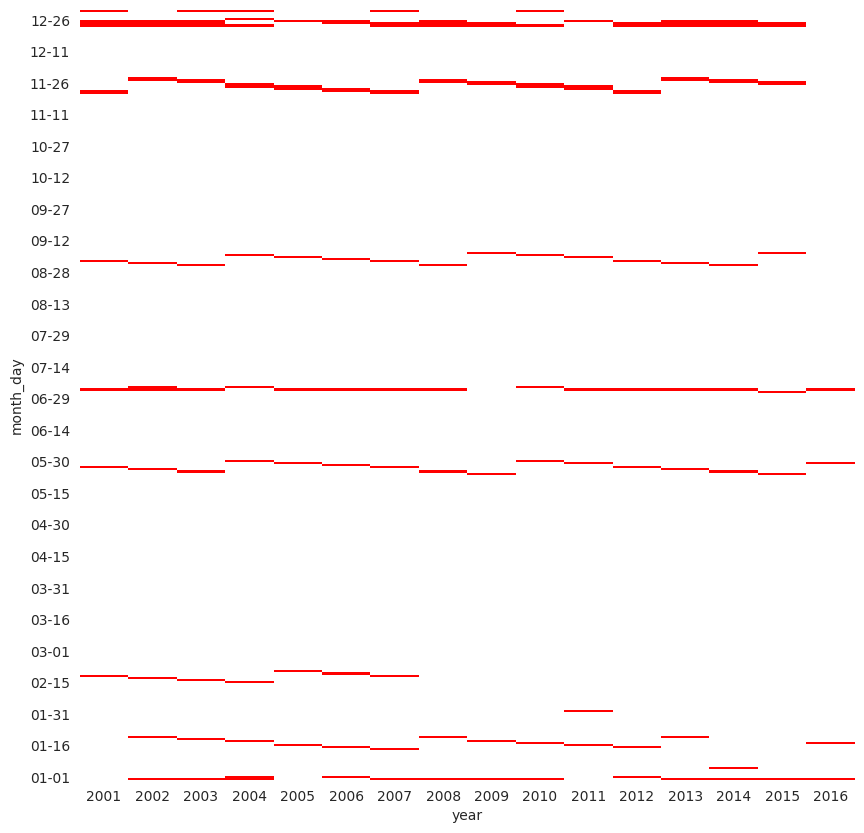

In [23]:
plt.figure(figsize=(10,10))
ax_hm = sns.heatmap(data=heat_map_data, cmap=['white','red'], cbar=False, yticklabels=15)
ax_hm.invert_yaxis()

Ahora que conocemos que el efecto de los días festivos en el conjunto de datos, podemos remover esos días.

Para eso utilizamos el dataset de **extra\_data** que cargamos al principio.

In [24]:
common_holidays = ['USNewYearsDay', 'Jan02_Mon_Fri', 'USMLKingsBirthday', 
    'USPresidentsDay', 'USMemorialDay', 'USIndependenceDay', 
    'Jul03_Mon_Fri', 'Jul05_Mon_Fri', 'USLaborDay', 'USThanksgivingDay', 
    'Day_after_Thx', 'ChristmasEve', 'USChristmasDay', 'Dec26_wkday', 
    'Dec31_Mon_Fri']

In [25]:
dates_with_holiday = (extra_data[common_holidays]==1).any(axis=1)

In [26]:
train_df_cl['holiday']=dates_with_holiday

In [27]:
train_df_cl['two_weeks_lag_holiday'] = train_df_cl['holiday'].shift(periods=14, fill_value = False)

Filtramos el conjunto de datos con dias que no sean festivos y que no tengan un dia festivo con retardo de dos semanas.

In [28]:
train_df_cl_no_holiday= train_df_cl[~train_df_cl.holiday & ~train_df_cl.two_weeks_lag_holiday]

<Axes: xlabel='two_week_lag_rides_x1000', ylabel='rides_x1000'>

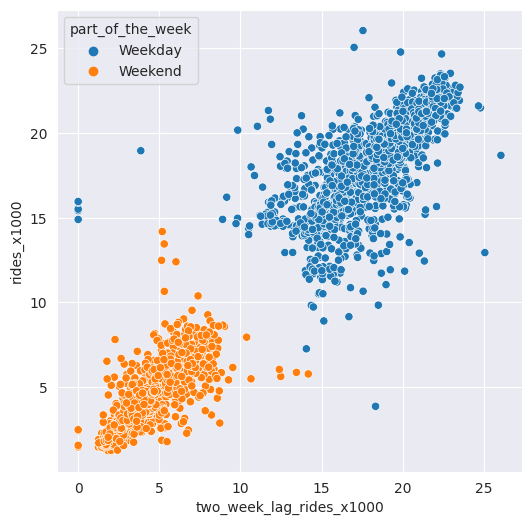

In [29]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=train_df_cl_no_holiday.two_week_lag_rides_x1000, y=train_df_cl_no_holiday.rides_x1000, hue=train_df_cl_no_holiday.part_of_the_week)

## Gráficos de matriz de correlación

Agregamos las características que creamos para nuestro subconjunto de datos conteniendo solo la estacion Clark/Lake.

Despues de esto, tomamos solo los registros correspondientes al año 2016

In [30]:
df['part_of_the_week']=df.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')
df['holiday'] = False
df['two_week_lag_rides']=0
for station in df.stationname.unique():
  df.loc[df.stationname==station,'two_week_lag_rides'] = df[df.stationname==station]['rides'].shift(periods=14, fill_value = 0)
for index, row in dates_with_holiday.iteritems():
  if row:        
    df.loc[index, 'holiday']=True


all_2016 = df.loc[train_days.index]['2016'].copy()

<ipython-input-30-fdfe128507cc>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row in dates_with_holiday.iteritems():
<ipython-input-30-fdfe128507cc>:11: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  all_2016 = df.loc[train_days.index]['2016'].copy()


In [31]:
all_2016.head()

,station_id,stationname,daytype,rides,part_of_the_week,holiday,two_week_lag_rides
date,,,,,,,
2016-01-01,40340,Berwyn,U,1703,Weekday,True,3593
2016-01-01,41040,Kedzie-Cermak,U,501,Weekday,True,1149
2016-01-01,41410,Chicago/Milwaukee,U,1923,Weekday,True,4366
2016-01-01,41510,Morgan-Lake,U,1007,Weekday,True,2837
2016-01-01,41480,Western-Brown,U,1602,Weekday,True,4181


Tomamos los datos solo de días entre semana y que no son días festivos

In [32]:
clustermap_data = all_2016[(all_2016.part_of_the_week=='Weekday')&(~all_2016.holiday)][['stationname','two_week_lag_rides']]

In [33]:
clustermap_data.head()

,stationname,two_week_lag_rides
date,,
2016-01-04,Damen-Cermak,1313
2016-01-04,Halsted-Orange,2338
2016-01-04,Harlem-Forest Park,1021
2016-01-04,King Drive,562
2016-01-04,Cicero-Forest Park,1231


Creamos la tabla pivote donde las filas son los días del año 2016, y las columnas son las estaciones. Cada celda en el conjunto de datos representa la cantidad de pasajeros para una estación y día específicos.

In [34]:
clustermap_data.pivot(columns='stationname', values='two_week_lag_rides')

stationname,18th,35-Bronzeville-IIT,35th/Archer,43rd,47th-Dan Ryan,47th-South Elevated,51st,54th/Cermak,63rd-Dan Ryan,69th,...,UIC-Halsted,Washington/Dearborn,Washington/Wells,Wellington,Western-Brown,Western-Cermak,Western-Forest Park,Western-Orange,Western/Milwaukee,Wilson
date,,,,,,,,,,,,,,,,,,,,,
2016-01-04,1688,1255,2717,975,2780,1230,920,2113,2548,4949,...,2465,12979,7023,2593,3631,1081,1409,3537,4787,4549
2016-01-05,1744,1324,2893,1008,2883,1243,1035,2128,2617,5134,...,2513,14158,6883,2695,3906,1067,1461,3560,5016,4506
2016-01-06,1574,1191,2734,954,2767,1249,940,2015,2449,4909,...,1983,11290,5403,2046,3274,1012,1334,3327,4342,4203
2016-01-07,974,963,1711,743,2490,1105,865,1403,2322,4394,...,1038,6893,2466,950,2014,692,996,2257,2315,3328
2016-01-08,430,509,648,355,1225,521,417,633,1505,2666,...,399,2084,388,227,771,329,574,801,861,1379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-22,1786,1418,2917,1114,3138,1179,1006,2122,2975,5178,...,2936,12107,8936,2967,3886,1070,1434,3809,5029,4843
2016-08-23,1836,1493,3125,1195,3251,1248,912,2403,2915,5325,...,3083,13550,8874,3189,4182,1131,1454,4073,5258,5074
2016-08-24,1883,1564,3007,1222,3229,1245,1083,2306,3060,5374,...,3183,12849,8944,3191,4318,1156,1462,3863,5252,5017


Creamos la matriz de correlación, y luego generamos la gráfica. La cual también incluye una función de clusterización para las estaciones. Es decir, las estaciones con correlación positiva mayor se encuentran contiguas y las estaciones con correlación negativa mayor se encuentran alejadas. Esto es representado con un dendograma en los ejes de la gráfica.

In [35]:
corr_matrix = clustermap_data.pivot(columns='stationname', values='two_week_lag_rides').corr()

In [36]:
corr_matrix.loc['O\'Hare Airport','UIC-Halsted']

-0.4639544813643622

In [37]:
corr_matrix.loc['Harlem-Lake','Quincy/Wells']

0.8410756562507453

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


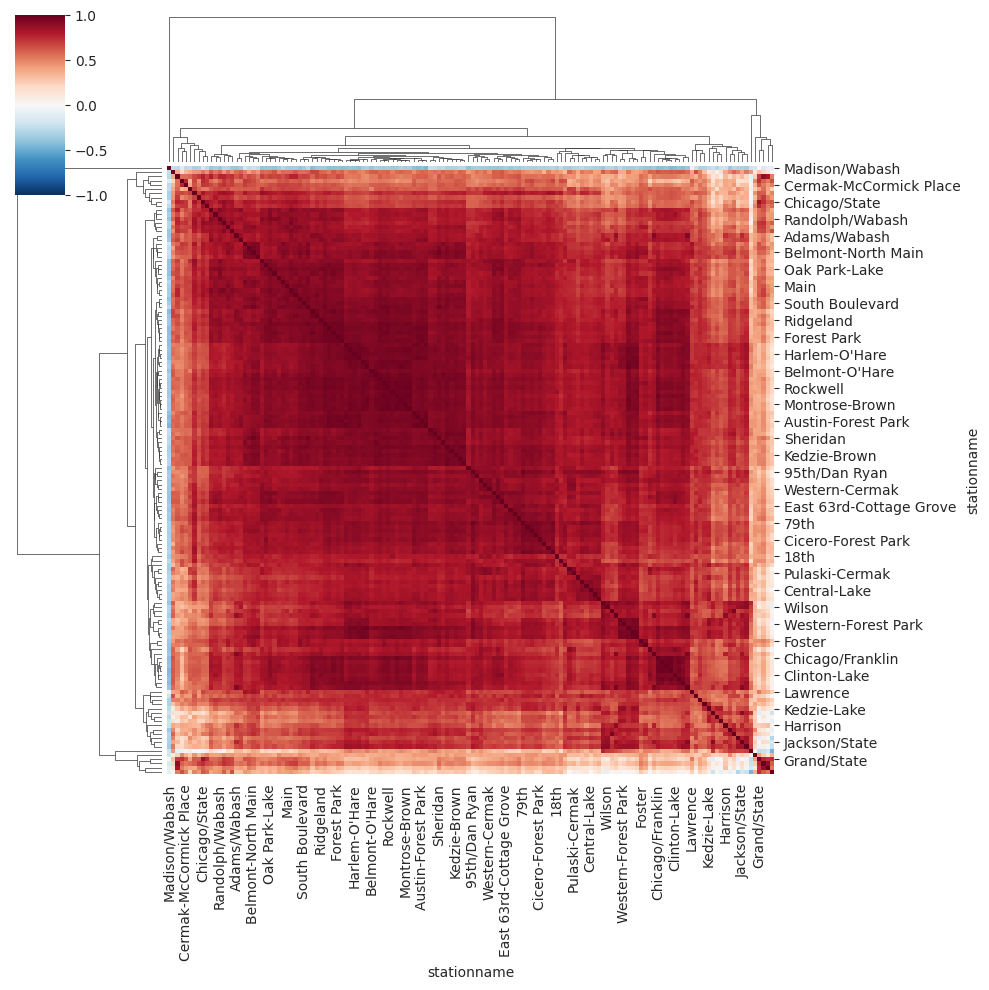

In [38]:
clustermap = sns.clustermap(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1, figsize=(10 ,10))


## Gráficos de líneas

In [39]:
from scipy.stats.mstats import gmean

In [40]:
line_plot_data_gmean = train_df_cl.groupby([pd.Grouper(freq='M'),'part_of_the_week']).agg({'rides_x1000':gmean, 'month_name':max, 'year':max}).reset_index()
line_plot_data_gmean.set_index('date', inplace=True)
line_plot_data_mean = train_df_cl.groupby([pd.Grouper(freq='M'),'part_of_the_week']).agg({'rides_x1000':'mean', 'month_name':max, 'year':max}).reset_index()
line_plot_data_mean.set_index('date', inplace=True)

In [41]:
line_plot_data_gmean.head()

,part_of_the_week,rides_x1000,month_name,year
date,,,,
2001-01-31,Weekday,15.751607,January,2001
2001-01-31,Weekend,1.886127,January,2001
2001-02-28,Weekday,15.197730,February,2001
2001-02-28,Weekend,2.014658,February,2001
2001-03-31,Weekday,16.475930,March,2001


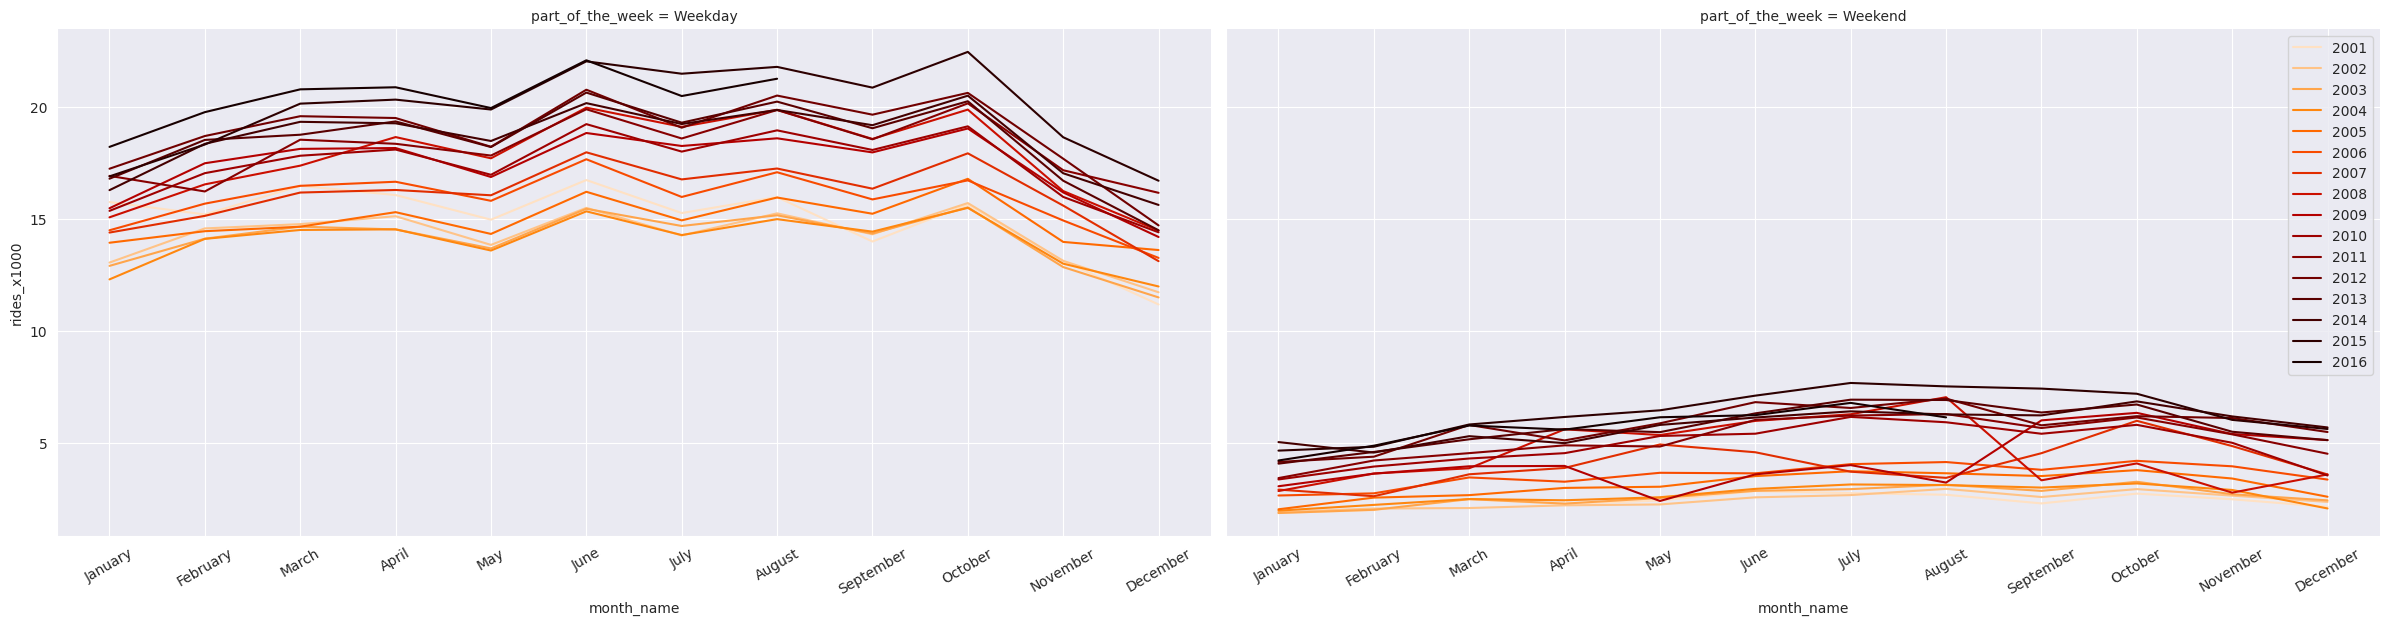

In [42]:
gline = sns.FacetGrid(line_plot_data_gmean, sharex=False, col='part_of_the_week', hue='year',height=6, aspect=2, palette='gist_heat_r')
gline.map_dataframe(sns.lineplot, x='month_name', y='rides_x1000', legend='full')
gline.axes[0,1].legend()
gline.set_xticklabels(rotation=30)

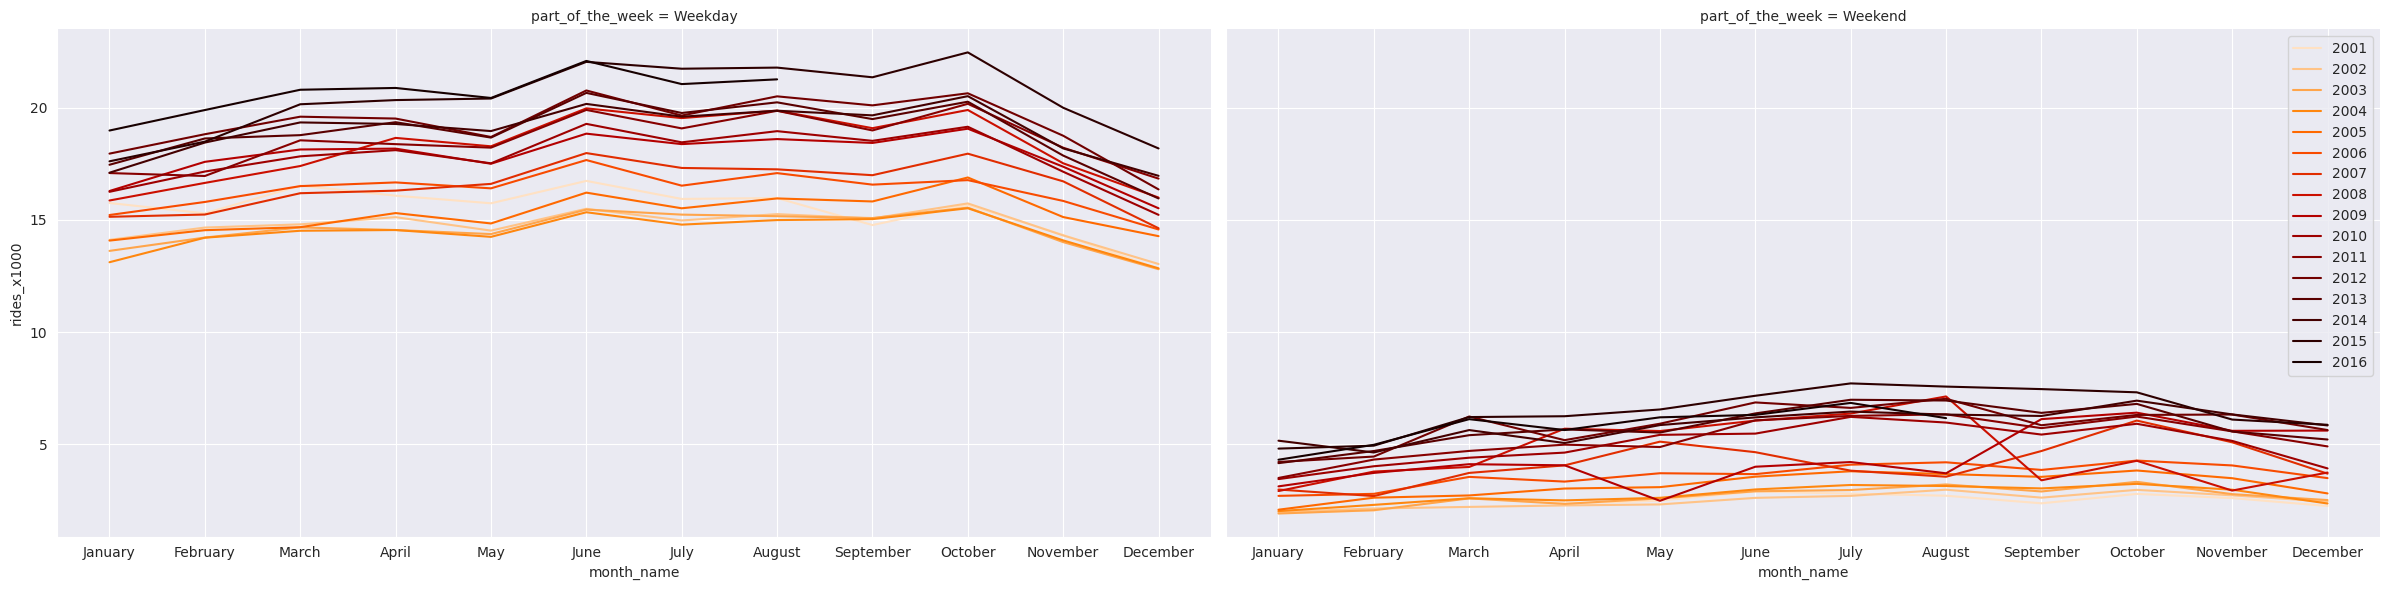

In [43]:
gline = sns.FacetGrid(line_plot_data_mean, sharex=False, col='part_of_the_week', hue='year',height=6, aspect=2, palette='gist_heat_r')
gline.map_dataframe(sns.lineplot, x='month_name', y='rides_x1000', legend='full')
gline.axes[0,1].legend()

In [44]:
fig = px.line(line_plot_data_gmean, x='month_name', y='rides_x1000', facet_col='part_of_the_week', color='year', color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.update_xaxes(tickangle=-45)
fig.show()

Los precios promedio por semana en Chicago se han registrado. Cargamos el archivo y generemos un gráfico de líneas para observar si hay alguna relación con el número de pasajeros.

In [47]:
gas_price_df = pd.read_csv('data/chicago_gas_prices.csv',index_col=0, parse_dates=True)

In [48]:
gas_price_df = gas_price_df.sort_index()

In [49]:
gas_price_df.head()

,gas_price
date,
2000-06-05,1.990
2000-06-12,2.134
2000-06-19,2.148
2000-06-26,2.029
2000-07-03,1.829


In [50]:
gas_price_df['month_name'] = gas_price_df.index.month_name() 
gas_price_df['year'] = gas_price_df.index.year 
gas_price_df['part_of_the_week']=gas_price_df.index.weekday.map(lambda x: 'Weekday' if x<5 else 'Weekend')

In [51]:
gas_price_df.head()

,gas_price,month_name,year,part_of_the_week
date,,,,
2000-06-05,1.990,June,2000,Weekday
2000-06-12,2.134,June,2000,Weekday
2000-06-19,2.148,June,2000,Weekday
2000-06-26,2.029,June,2000,Weekday
2000-07-03,1.829,July,2000,Weekday


In [52]:
line_plot_gas = gas_price_df['2001-01':'2016-08'].groupby(pd.Grouper(freq='M')).agg({'gas_price':'mean', 'month_name':max, 'year':max}).reset_index()
line_plot_gas.set_index('date', inplace=True)

In [53]:
line_plot_gas

,gas_price,month_name,year
date,,,
2001-01-31,1.5624,January,2001
2001-02-28,1.5220,February,2001
2001-03-31,1.4265,March,2001
2001-04-30,1.7352,April,2001
2001-05-31,2.0220,May,2001
...,...,...,...
2016-04-30,2.3565,April,2016
2016-05-31,2.5658,May,2016
2016-06-30,2.7640,June,2016


In [54]:
fig = px.line(line_plot_gas, x='month_name', y='gas_price', color='year', color_discrete_sequence=px.colors.qualitative.Alphabet)
fig.show()

Ahora veamos si hay alguna relación entre los precios promedio de la gasolina y el número de pasajeros. 

Para esto calculamos el promedio mensual de los precios de la gasolina con un retardo de 2 semanas y lo graficamos en contra de la media geométrica de el número de pasajeros en la estación de Clark/Lake

In [55]:
gas_price_df['two_week_lag_gas_price'] = gas_price_df.gas_price.shift(periods=14,freq='d')
gas_price_df['two_week_lag_gas_price'] = gas_price_df['two_week_lag_gas_price'].fillna(0)

In [56]:
gas_price_df.head()

,gas_price,month_name,year,part_of_the_week,two_week_lag_gas_price
date,,,,,
2000-06-05,1.990,June,2000,Weekday,0.000
2000-06-12,2.134,June,2000,Weekday,0.000
2000-06-19,2.148,June,2000,Weekday,1.990
2000-06-26,2.029,June,2000,Weekday,2.134
2000-07-03,1.829,July,2000,Weekday,2.148


In [57]:
line_plot_gas_lagged = gas_price_df['2001-01-01':'2016-08-31'].groupby(pd.Grouper(freq='M')).agg({'gas_price':'mean', 'month_name':max, 'year':max}).reset_index()
line_plot_gas_lagged.set_index('date', inplace=True)

In [58]:
line_plot_gas_lagged.head()

,gas_price,month_name,year
date,,,
2001-01-31,1.5624,January,2001
2001-02-28,1.5220,February,2001
2001-03-31,1.4265,March,2001
2001-04-30,1.7352,April,2001
2001-05-31,2.0220,May,2001


In [59]:
line_plot_data_gmean.loc[line_plot_data_gmean.part_of_the_week=='Weekday', 'gas_price'] = line_plot_gas_lagged
line_plot_data_gmean.loc[line_plot_data_gmean.part_of_the_week=='Weekend', 'gas_price'] = line_plot_gas_lagged

In [60]:
line_plot_data_gmean.head()

,part_of_the_week,rides_x1000,month_name,year,gas_price
date,,,,,
2001-01-31,Weekday,15.751607,January,2001,1.5624
2001-01-31,Weekend,1.886127,January,2001,1.5624
2001-02-28,Weekday,15.197730,February,2001,1.5220
2001-02-28,Weekend,2.014658,February,2001,1.5220
2001-03-31,Weekday,16.475930,March,2001,1.4265


In [61]:
line_plot_data_gmean.year = line_plot_data_gmean.year.astype(str) # we make it string so it is considered categorical variable

In [62]:
fig = px.scatter(line_plot_data_gmean, x='gas_price', y='rides_x1000', color='year', facet_col='part_of_the_week', color_discrete_sequence=px.colors.qualitative.Alphabet) #, trendline='ols')
fig.show()

# PCA

In [64]:
lag_14_data = pd.read_csv('data/lag_14_data.csv', index_col=0)

In [65]:
lag_14_data.head()

,l14_40010,l14_40020,l14_40030,l14_40040,l14_40050,l14_40060,l14_40070,l14_40080,l14_40090,l14_40100,...,l14_41400,l14_41410,l14_41420,l14_41440,l14_41450,l14_41460,l14_41480,l14_41490,l14_41500,l14_41660
1,1.463,3.222,1.500,8.371,3.544,4.599,7.341,4.527,2.095,4.411,...,5.809,2.071,4.785,1.868,11.698,2.402,3.609,2.903,2.001,13.170
2,1.505,3.281,1.547,8.351,3.612,4.725,7.537,4.514,2.185,4.399,...,5.920,2.163,4.906,1.889,12.226,2.417,3.528,2.932,2.008,13.156
3,1.519,3.303,1.521,8.359,3.660,4.684,7.782,4.588,2.166,4.474,...,6.066,2.177,4.985,1.895,12.206,2.356,3.609,3.028,2.117,13.103
4,1.490,3.397,1.568,7.852,3.668,4.769,7.671,4.573,2.199,4.531,...,5.831,2.188,5.069,1.905,12.452,2.436,3.618,2.932,2.045,13.295
5,1.496,3.385,1.598,7.621,3.891,4.720,6.847,4.689,2.206,4.767,...,5.809,2.208,5.180,1.864,13.195,2.447,3.500,2.394,2.096,13.140


In [66]:
from sklearn.decomposition import PCA

In [67]:
pca = PCA()
pca.fit(lag_14_data)

PCA()

In [68]:
print(pca.n_components_)
print(pca.components_.shape) #eigenvectors

125
(125, 125)


In [69]:
pca.singular_values_ #eigenvalues

array([1194.3915684 ,  345.3694834 ,  239.72012542,  200.21823414,
        189.75117222,  173.46975728,  132.41192141,  129.33667745,
        113.90546579,  105.12499978,  101.77635913,   90.53940512,
         81.98123716,   76.30916001,   71.74823034,   64.81746583,
         62.05804729,   59.61401722,   56.18049252,   53.24889059,
         52.68274638,   48.68963461,   46.2774289 ,   43.86064131,
         41.36371175,   40.78308872,   39.20766687,   37.3281204 ,
         36.79020825,   34.74682136,   34.05858053,   32.37982906,
         31.88572203,   30.56374859,   29.51424445,   28.31324246,
         27.93730097,   26.64252381,   25.95380963,   25.44910077,
         24.67457985,   23.16886791,   22.32753341,   21.97008566,
         21.46338509,   20.43898673,   20.33054134,   19.5772041 ,
         19.01065678,   18.64782216,   18.34900941,   18.17915285,
         17.7442349 ,   17.27315562,   16.8621717 ,   16.51830616,
         15.92838499,   15.49411427,   15.30859478,   14.07042

In [70]:
projected_lag_14 = pca.transform(lag_14_data)
projected_lag_14 = projected_lag_14*-1 # just for matching the book's result https://stackoverflow.com/questions/44765682/in-sklearn-decomposition-pca-why-are-components-negative

In [71]:
len(pca.components_)

125

In [72]:
variance_ration_cumsum = np.cumsum(np.pad(pca.explained_variance_ratio_, (1, 0), "constant"))

In [73]:
fig =px.line(x=range(50), y=variance_ration_cumsum[:50], width=500, height=500)
fig.update_yaxes(range=[-0.02, 1.02])
fig.update_xaxes(range=[-2, 53])

In [74]:
fig =px.scatter(x=projected_lag_14[:,0], y = projected_lag_14[:,1], color_discrete_sequence=['black'], width=500, height=500, opacity=0.3)
fig.update_yaxes(range=[-50, 45])
fig.update_xaxes(range=[-50, 45])
fig.show()

In [75]:
projected_df = pd.DataFrame(projected_lag_14[:, :2], columns=['Component1','Component2'])

In [76]:
projected_df.index = train_df_cl.index
projected_df['day'] = projected_df.index.day_name()
projected_df['year'] = projected_df.index.year

In [77]:
fig = px.violin(projected_df,x='day',y='Component1',width=1000, height=400)
fig.layout.template = 'plotly_white' #  different template styles https://plotly.com/python/templates/ 
fig.show()

In [78]:
fig = px.violin(projected_df,x='year',y='Component2',width=1000, height=400)
fig.layout.template = 'plotly_dark' 
fig.show()